<a href="https://colab.research.google.com/github/andradefisio/Calculo-1/blob/main/ImersaoDados4_Alura_AntonioAndrade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

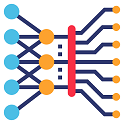

# **Desafio Dados 4 - Alura**
## Antonio Andrade

>[Aula 1](#scrollTo=imJ4bbQ6vOMF)
>>[Desafios desta aula](#scrollTo=jDvm5Bxc4sQk&line=1&uniqifier=1)

>>>[Carregando a base de dados](#scrollTo=NaUjLLkl23Z6)

>>>[1 - Realizar a média da metragem para cada um dos bairros. (Proposto pelo Paulo)](#scrollTo=j4aomqG4HgaC)

>>>[2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)](#scrollTo=h4firn5IXyaK&line=1)

>>>[3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago)](#scrollTo=q6xSn-qRYJXw&line=1)

>>>[4 - Pegar outras estatísticas dos dados (como média, mediana, mim, max). (Proposto pela Vivian)](#scrollTo=aLILbr-hPC40&line=1)

>>>[5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)](#scrollTo=uC45zZqNTpUz&line=1)


>[Aula2]()

>[Aula3]()

>[Aula4]()

# Desafios desta aula

Começaremos a nossa análise de dados entendendo as características gerais dos nossos dados e olhando mais no detalhe para os bairros que tem imóveis à venda.

# Carregando a base de dados

Em primeiro lugar, devemos importar a base de dados. Eu fiz da seguinte maneira:

- Com o link fornecido na descrição da aula (https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv), ao clicar neste link, os dados "aparecem" em uma janela do navegador. 

- Clicando com o botão direito do mouse sobre este conjunto de dados nesta janela, há a opção de salvar estes dados (salvar como "filename.csv")

- Estes dados foram salvos em um diretório local. 


No ambiente do Colab, importar a biblioteca "Pandas", necessária para as análises de dados:


In [ ]:
import pandas as pd

In [ ]:
# criando o data frame com os dados:

df = pd.read_csv('dados_imoveis.csv')

# lendo as primeiras informações com a fç head(as primeiras 5 linhas). Também pode ser feio uma prévia 
# ou um overview dos dados clicando no lado esquerdo do Colab, sobre o nome do próprio arquivo. 
# Assim já é possivel ter uma "visão bem geral dos dados".

df.head(7) # lendo as 7 primeiras linhas do data frame

# Se desejar ler os dados diretamente da webpage,
# selecionar este modo se não quiser fazer com o anterior. Basta retirar o asteríso da frente das sentenças:

# endereco = 'https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv'
# df = pd.read_csv(endereco)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000
5,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000
6,"Rua Francisco Paulo, 31",Cidade Mãe do Céu,São Paulo,145,4,4,2,R$ 850.000


Este data frame possui 10008 linhas X 8 features(colunas)


In [ ]:
df.info() # informação sobre os tipos de dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


Primeiro vamos observar a metragem média de todos os imóveis:

In [86]:
df.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.000000,10008.000000,10008.000000,10008.000000
mean,442.300659,3.483114,3.879097,4.097222
std,7515.379389,1.064200,1.988467,2.824014
min,10.000000,1.000000,1.000000,1.000000
25%,173.000000,3.000000,2.000000,2.000000
50%,290.000000,3.000000,4.000000,4.000000
75%,460.250000,4.000000,5.000000,5.000000
max,750000.000000,16.000000,40.000000,50.000000


Observa-se que provavelmente o valor médio da metragem foi elevado devida à influência daqueles valores cuja metragem do imóvel era "muito grande".

In [91]:
metragem_media_TodosImoveis = df.mean()
metragem_media_TodosImoveis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Metragem     442.300659
Quartos        3.483114
Banheiros      3.879097
Vagas          4.097222
dtype: float64

In [85]:
# pela mediana:
metragem_mediana_TodosImoveis = df.median()
metragem_mediana_TodosImoveis

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Metragem     290.0
Quartos        3.0
Banheiros      4.0
Vagas          4.0
dtype: float64

In [105]:
# Agora por bairro:

# Primeiro realizar o agrupamento dos bairros, usando a função "groupby"
# Depois aplicar a função "mean()"

metragem_mediaImovel_bairro = df.groupby(['Bairro']).mean()
metragem_mediaImovel_bairro



,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,253.056818,3.318182,3.079545,2.909091
Alto da Boa Vista,418.875000,4.125000,5.125000,4.625000
Alto da Lapa,294.337209,3.151163,3.790698,3.906977
Alto da Mooca,270.050000,3.300000,2.600000,3.650000
Alto de Pinheiros,433.444988,3.938875,4.838631,5.004890
...,...,...,...,...
Vila Água Funda,152.200000,2.600000,2.200000,2.600000
Água Branca,191.000000,3.153846,3.076923,2.461538
Água Fria,165.416667,2.833333,3.416667,2.500000


Como os dados foram agrupados, ocorreu uma diminuição do número de observações, sendo que agora o data frame é composto de 701 rows ou linhas, ou 701 bairros.

In [93]:
# ordenando a metragem dos bairros por ordem decrescente da metragem disponível

metragem_mediaImovel_bairro_decrescente = metragem_mediaImovel_bairro.sort_values(by='Metragem', ascending = False)
metragem_mediaImovel_bairro_decrescente

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Sítio Represa,37000.000000,4.000000,2.000000,4.000000
Vila Castelo,2850.000000,3.000000,3.000000,10.000000
Jardim Guedala,2486.640199,4.091811,5.732010,6.057072
Jardim das Camélias,1700.000000,4.000000,7.000000,13.000000
Chácara Flora,1260.727273,4.818182,6.545455,7.272727
...,...,...,...,...
Cidade Antônio Estevão de Carvalho,57.500000,2.000000,1.000000,1.000000
Jardim Nova Germania,57.000000,3.000000,1.000000,5.000000
Jardim Benfica,48.000000,2.000000,1.000000,1.000000


In [87]:
metragem_medianaImovel_bairro = df.groupby(['Bairro']).median()
metragem_medianaImovel_bairro

,Metragem,Quartos,Banheiros,Vagas
Bairro,,,,
Aclimação,227.5,3.0,3.0,3.0
Alto da Boa Vista,378.0,4.0,5.5,4.0
Alto da Lapa,255.0,3.0,4.0,4.0
Alto da Mooca,182.5,3.0,2.0,4.0
Alto de Pinheiros,412.0,4.0,5.0,4.0
...,...,...,...,...
Vila Água Funda,143.0,2.0,2.0,2.0
Água Branca,174.0,3.0,3.0,2.0
Água Fria,174.5,3.0,4.0,2.0


In [89]:
metragem_medianaImovel_bairro_decrescente = metragem_medianaImovel_bairro.sort_values(by='Metragem', ascending = False)
metragem_medianaImovel_bairro_decrescente


,Metragem,Quartos,Banheiros,Vagas
count,701.000000,701.000000,701.000000,701.000000
mean,273.034950,3.021398,2.819544,3.002853
std,1401.034938,0.866585,1.307081,1.596869
min,10.000000,1.000000,1.000000,1.000000
25%,130.000000,3.000000,2.000000,2.000000
50%,178.000000,3.000000,3.000000,2.500000
75%,250.000000,3.000000,4.000000,4.000000
max,37000.000000,10.000000,8.000000,13.000000


No caso da média, existem imóveis com uma metragem muito alta ("Sitio Represa = 37000 m^2), podendo caracterizar "outliers". Além disso, observa-se que o "standard deviations" da metragem do imóvel e muito elevado, indicando que a média talvez não seria um bom parâmetro para a análise dos dados. Vamos então analisar o valor da mediana, ou o valor central dos dados. 

As demais características dos imóveis também. Observa-se na base dos dados imóveis com até 10 banheiros e com várias vagas. Isto pode influenciar os valores médios. 
Pela mediana, observa-se os valores anterires. 

# 2 - Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do Pandas). (Proposto pelo Thiago)

# 3- Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, assim como tentar colocar alguma conclusão. (Proposto pelo Thiago) 

# 4 - Pegar outras estatísticas dos dados (como média, mediana, min, max)

In [70]:
bairros_grupos = df.groupby(['Bairro'])
bairros_grupos_min = bairros_grupos.min()

bairros_grupos_min

# metragem média dos imóveis (tamanho médio da metragem, quartos, banheiros e vagas garagem)

# bairros_metragem_media.max()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.min is deprecated. In a future version, a TypeError will be raised. Before calling .min, select only columns which should be valid for the function.
  


,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
Bairro,,,,,,
Aclimação,São Paulo,104,2,1,1,1 000 000
Alto da Boa Vista,São Paulo,315,4,3,3,1 680 000
Alto da Lapa,São Paulo,46,1,1,1,1 100 000
Alto da Mooca,São Paulo,84,2,1,1,1 049 400
Alto de Pinheiros,São Paulo,100,2,1,1,1 180 000
...,...,...,...,...,...,...
Vila Água Funda,São Paulo,90,2,2,2,370 000
Água Branca,São Paulo,91,2,1,1,1 099 000
Água Fria,São Paulo,60,2,1,2,1 195 000


In [43]:
# metragem mínima dos imóveis
bairros_metragem_media.min()

Metragem     10.0
Quartos       1.0
Banheiros     1.0
Vagas         1.0
dtype: float64

In [44]:
# metragem máxima dos imóveis
bairros_metragem_media.max()

Metragem     37000.0
Quartos         10.0
Banheiros        8.0
Vagas           16.0
dtype: float64

# 5 - Descobrir quais são os bairros que não tem nome de rua. (Proposto pela Vivian)

In [119]:
# criar uma "máscara em Bairros" que retorna os valores faltantes ou NaN

mascara = df["Rua"].isna() # essa máscara seleciona, na coluna Rua, todos os valores que são NaN

# aplicando a máscara anterior no conjunto dos nossos dados (df), obtemos como retorno os valores faltantes e os respectivos bairros.

Bairros_imovel_SemNomeRua = df[mascara]
Bairros_imovel_SemNomeRua


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685 000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,15 000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,849 000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,1 100 000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,5 500 000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,2 800 000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,400 000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,750 000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,9 500 000


Existem 3434 imóveis que não não apresentam "nome de rua". 

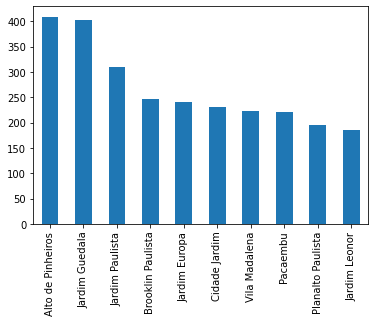

In [120]:
df['Bairro'].value_counts().head(10).plot.bar()

In [52]:
n_imoveis_bairro = df['Bairro'].value_counts()

In [64]:
# criando uma lista de caracteres especiais para depois disso removê-las:

caracteres_especiais = ["!",'"',"#","%","&","'","(",")","*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_","`","{","|","}","~","–","R","$"]


for caracter in caracteres_especiais:
    df['Valor'] = df['Valor'].str.replace(caracter, ' ')

df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7 000 000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3 700 000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380 000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685 000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540 000
...,...,...,...,...,...,...,...,...
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665 000
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2 300 000
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1 050 000
10006,"Rua Manuel Onha, , 514",Vila Oratório,São Paulo,185,3,2,2,2 200\n Mês
